# HOUANDJAN ANOMAKA ARTHUR

## Analyses descriptives

#### L'objectif de cette analyse est de parcourir les différentes(02) bases de données dans le but de décéler les informations pertinentes qui nous permettront de choisir la direction dans laquelle nous souhaitons nous orientés (sujet de modélisation).

Nous avons deux bases de données différentes : 
* Une base des incidents qui décrit les détails de chaque incident auquel ont assisté les pompiers de Londres depuis le 1er janvier 2009. Les informations sont fournies pour savoir quand et où l'incident s'est produit et le type d'incident.


* Une base des mobilisations qui contient les détails de chaque camion de pompiers (appareil de pompage) envoyé sur un incident depuis janvier 2009. Les informations sont fournies pour l'appareil mobilisé, d'où il a été déployé et les heures enregistrées pour arriver à l'incident

#### 1. Lecture et vérification les données
- 1.1 Lecture des tables

Importation des outils nécessaires

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns
from collections import Counter

import warnings
import os
warnings.filterwarnings('ignore') # Filtration des erreurs pas pertinentes 

Importation et lecture des bases de données. 

In [2]:
dfa = pd.read_csv("LFB Incident data Last 3 years.csv",sep=",")
dfb =pd.read_excel("LFB Mobilisation data Last 3 years.xlsx")

## 1.1 Exploration de la base des incidents

In [10]:
dfa.head()

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),NumCalls
0,000001-01012020,01 Jan 2020,2020,00:02:11,0,Special Service,Special Service,Lift Release,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,...,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,339.0,3.0
1,000003-01012020,01 Jan 2020,2020,00:06:30,0,Fire,Primary Fire,NaN,Non Residential,Private Garden Shed,...,324.0,Hillingdon,292.0,Hillingdon,1.0,2.0,2.0,1.0,339.0,3.0
2,000004-01012020,01 Jan 2020,2020,00:07:07,0,Special Service,Special Service,Lift Release,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,...,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,339.0,1.0
3,000008-01012020,01 Jan 2020,2020,00:11:05,0,False Alarm,AFA,NaN,Non Residential,Telephone exchange,...,195.0,Richmond,NaN,NaN,1.0,1.0,1.0,1.0,339.0,1.0
4,000009-01012020,01 Jan 2020,2020,00:11:16,0,Fire,Secondary Fire,NaN,Outdoor Structure,Small refuse/rubbish container,...,426.0,Edmonton,NaN,NaN,1.0,1.0,1.0,1.0,339.0,1.0


In [11]:
dfa.describe()

,CalYear,HourOfCall,UPRN,USRN,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FirstPumpArriving_AttendanceTime,SecondPumpArriving_AttendanceTime,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),NumCalls
count,381366.000000,381366.000000,3.813660e+05,3.813660e+05,165833.000000,165833.000000,381366.00000,381366.000000,165833.000000,165833.000000,359041.000000,139168.000000,375902.000000,375902.000000,378169.000000,378065.000000,378065.000000,381363.000000
mean,2021.321172,13.385304,1.913246e+10,2.045177e+07,530639.479525,180318.180416,530635.51444,180457.547867,51.324623,-0.118338,310.353820,389.484371,1.405446,1.550739,1.600377,1.362321,484.117229,1.310909
std,0.992867,6.294234,4.435245e+10,4.505919e+06,10502.329024,7570.879037,9766.70003,7471.794791,3.057145,0.151196,131.274992,144.514174,0.788704,0.917132,1.362421,4.266786,1513.516503,1.469377
min,2020.000000,0.000000,0.000000e+00,4.200558e+06,503587.000000,155901.000000,503550.00000,155950.000000,0.000000,-0.510069,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,339.000000,1.000000
25%,2020.000000,9.000000,0.000000e+00,2.040118e+07,524838.000000,175764.000000,525150.00000,175950.000000,51.465839,-0.201611,228.000000,297.000000,1.000000,1.000000,1.000000,1.000000,346.000000,1.000000
50%,2021.000000,14.000000,0.000000e+00,2.120125e+07,530849.000000,180959.000000,530950.00000,181050.000000,51.512563,-0.116008,292.000000,367.000000,1.000000,1.000000,1.000000,1.000000,352.000000,1.000000
75%,2022.000000,18.000000,1.001023e+10,2.210064e+07,537063.000000,185079.000000,536350.00000,185250.000000,51.549157,-0.024654,370.000000,456.000000,2.000000,2.000000,2.000000,1.000000,364.000000,1.000000
max,2023.000000,23.000000,2.000044e+11,9.999042e+07,560461.000000,200885.000000,611150.00000,302450.000000,51.691412,0.313635,1200.000000,1200.000000,14.000000,14.000000,156.000000,680.000000,247520.000000,111.000000


In [12]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381366 entries, 0 to 381365
Data columns (total 39 columns):
IncidentNumber                            381366 non-null object
DateOfCall                                381366 non-null object
CalYear                                   381366 non-null int64
TimeOfCall                                381366 non-null object
HourOfCall                                381366 non-null int64
IncidentGroup                             381366 non-null object
StopCodeDescription                       381366 non-null object
SpecialServiceType                        136659 non-null object
PropertyCategory                          381366 non-null object
PropertyType                              381366 non-null object
AddressQualifier                          381366 non-null object
Postcode_full                             165833 non-null object
Postcode_district                         381366 non-null object
UPRN                                      3813

- Affichons le nombre d'incicent par année. Nous rappellons que nous disposons d'un échantillon de 3 années. L'année 2023, nous avons que la moitié de l'année (5 mois).

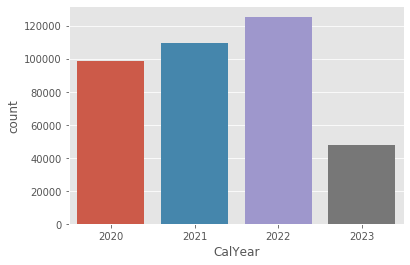

In [31]:
sns.countplot(x='CalYear',data = dfa); 

In [48]:
dfa['DateOfCall_bis'] = pd.to_datetime(df_test['DateOfCall'])
dfa["MonthOfCall"] = dfa['DateOfCall_bis'].dt.month

In [79]:
dfa_gprmonth = dfa.groupby(["MonthOfCall","CalYear"]).count().reset_index() 

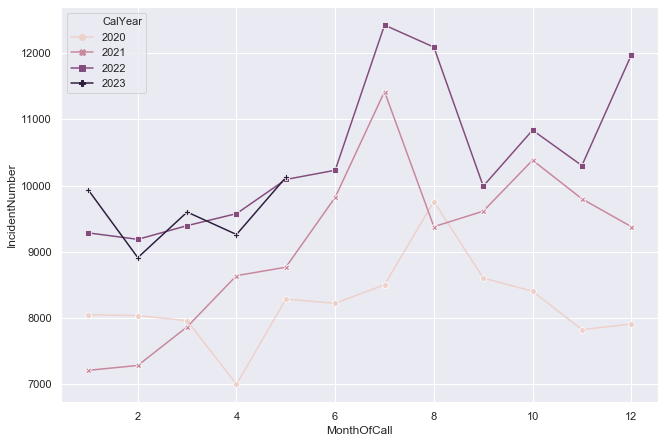

In [80]:
sns.set(rc={'figure.figsize':(10.7,7.27)})
sns.lineplot(data=dfa_gprmonth, x="MonthOfCall", y="IncidentNumber", hue="CalYear", style="CalYear",dashes=False,markers=True,sizes=(.25, 2.5))

Des pics d'incidents sont observés dans les mois de mai et juillet.

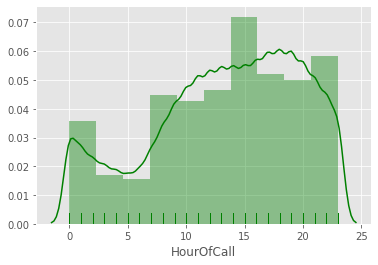

In [24]:
sns.distplot(dfa['HourOfCall'], bins=10, kde=True, rug=True, color ='green');

In [93]:
dfa['v1'] = (dfa['TimeOfCall'].str[:2]).astype(int) #*3600
dfa['v2'] = (dfa['TimeOfCall'].str[4:5]).astype(int) #*60
dfa['v3'] = (dfa['TimeOfCall'].str[7:8]).astype(int)
dfa['TimeOFCallSeconde'] = dfa['v1'] + dfa['v2'] + dfa['v3']
dfa.head()

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,first,col,hour,min,sec,hourensec,v1,v2,v3,TimeOFCallSeconde
0,000001-01012020,01 Jan 2020,2020,00:02:11,0,Special Service,Special Service,Lift Release,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,...,NaN,00,0,2,1,0,0,2,1,3
1,000003-01012020,01 Jan 2020,2020,00:06:30,0,Fire,Primary Fire,NaN,Non Residential,Private Garden Shed,...,00:06:30,00,0,6,0,0,0,6,0,6
2,000004-01012020,01 Jan 2020,2020,00:07:07,0,Special Service,Special Service,Lift Release,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,...,NaN,00,0,7,7,0,0,7,7,14
3,000008-01012020,01 Jan 2020,2020,00:11:05,0,False Alarm,AFA,NaN,Non Residential,Telephone exchange,...,NaN,00,0,1,5,0,0,1,5,6
4,000009-01012020,01 Jan 2020,2020,00:11:16,0,Fire,Secondary Fire,NaN,Outdoor Structure,Small refuse/rubbish container,...,NaN,00,0,1,6,0,0,1,6,7


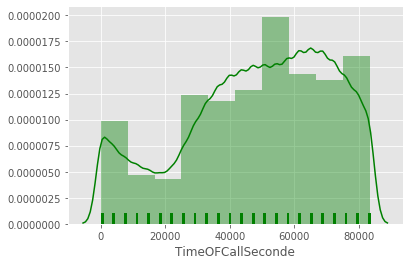

In [84]:
sns.distplot(dfa['TimeOFCallSeconde'], bins=10, kde=True, rug=True, color ='green');

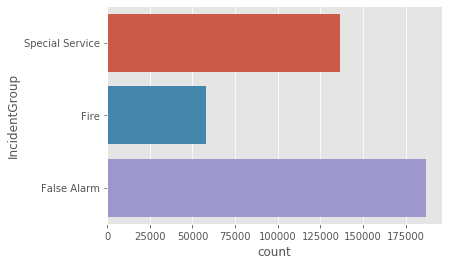

In [13]:
sns.countplot(y='IncidentGroup',data = dfa); 

In [15]:
dfa['IncidentGroup'].value_counts(normalize=True)*100

False Alarm        49.014070
Special Service    35.856893
Fire               15.129036
Name: IncidentGroup, dtype: float64

Près de 50% des incidents sont de fausses alertes vs 50% d'incidents réels.

In [25]:
dfa['StopCodeDescription'].value_counts(normalize=True)*100

AFA                                      38.037214
Special Service                          35.315419
False alarm - Good intent                10.074050
Primary Fire                              7.763146
Secondary Fire                            7.345175
False alarm - Malicious                   0.902807
Flood call attended - Batch mobilised     0.518662
Use of Special Operations Room            0.022813
Chimney Fire                              0.015471
Late Call                                 0.005244
Name: StopCodeDescription, dtype: float64

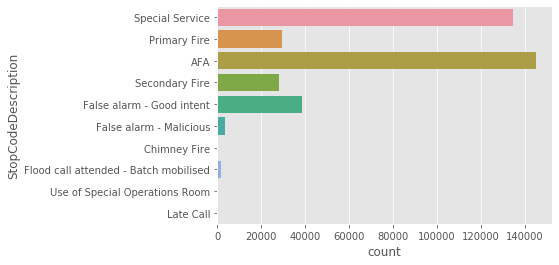

In [30]:
sns.countplot(y='StopCodeDescription',data = dfa); 

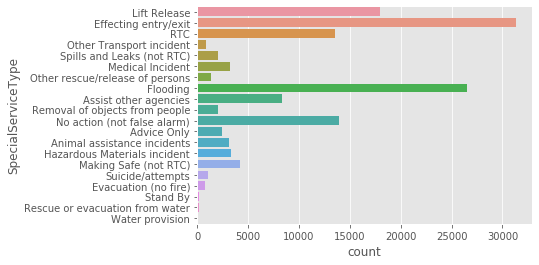

In [32]:
sns.countplot(y='SpecialServiceType',data = dfa);

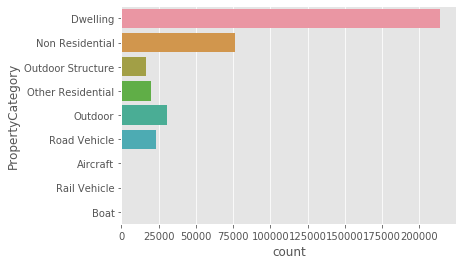

In [34]:
sns.countplot(y='PropertyCategory',data = dfa); 

- Plus de 50% des appels concernent des incidents déclarés sur les lieux d'habitation

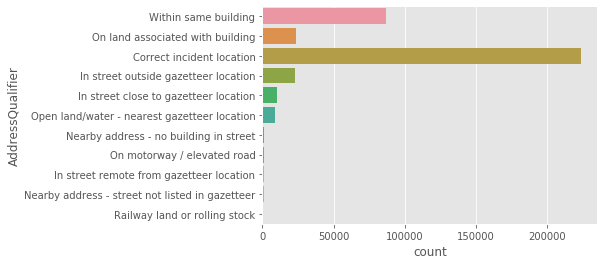

In [37]:
sns.countplot(y='AddressQualifier',data = dfa); 

In [36]:
dfa['AddressQualifier'].value_counts(normalize=True)*100

Correct incident location                          58.679589
Within same building                               22.693685
On land associated with building                    6.225516
In street outside gazetteer location                6.073693
In street close to gazetteer location               2.641295
Open land/water - nearest gazetteer location        2.337125
Nearby address - street not listed in gazetteer     0.357137
Nearby address - no building in street              0.315707
On motorway / elevated road                         0.302334
In street remote from gazetteer location            0.218950
Railway land or rolling stock                       0.154969
Name: AddressQualifier, dtype: float64

- PLus de 58% personnes qui appelent pour déclaré un incident donnent l'emplacement exact de l'incident. C'est peu-être le lieu d'habitation de ces personnes. 22% des appelants sont dans l'immeuble dans lequels il y a l'incident.  Bien comprendre cette variable... Je pense que je ne la comprend pas trop. Pourtant elle peut avoir de l'impact sur le temps d'arriver des pompiers sur les lieux.

- Top 10 des stations d'interventions au sol.

In [46]:
(dfa['IncidentStationGround'].value_counts(normalize=True)*100).head(10)

Soho                3.032790
Paddington          2.482137
Lambeth             1.966358
Euston              1.934105
Shoreditch          1.830530
North Kensington    1.811388
Tottenham           1.768385
Chelsea             1.691031
Hammersmith         1.666645
Stoke Newington     1.574607
Name: IncidentStationGround, dtype: float64

- Lorsque pour un incident donné le FirstPumpArriving_AttendanceTime égale à nul alors aucune mobilisation n'a été faite sur ce incident
je supprime donc les incidents à Null et je ferai ensuite les statistiques sur cette variable;

In [49]:
dfa_FirstPumpArriving_Attendance = dfa.dropna(axis = 0, how = 'all', subset = ['FirstPumpArriving_AttendanceTime']) 

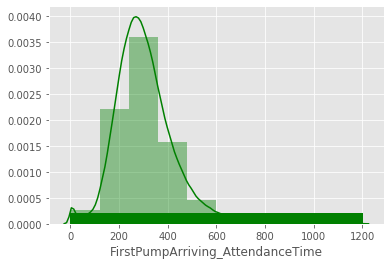

In [50]:
sns.distplot(dfa_FirstPumpArriving_Attendance['FirstPumpArriving_AttendanceTime'], bins=10, kde=True, rug=True, color ='green');

- Lorsque pour incident la variable SecondPumpArriving_AttendanceTim est null alors que la firstPump est renseignée. Alors c'est qu'il y a eu une seule mobilisation sur cet incident

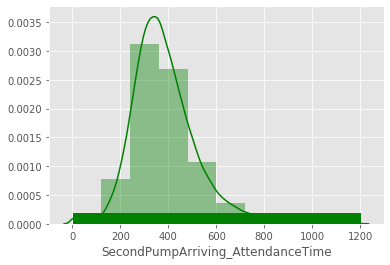

In [53]:
dfa_SecondPumpArriving_AttendanceTim = dfa.dropna(axis = 0, how = 'all', subset = ['SecondPumpArriving_AttendanceTime']) 
sns.distplot(dfa_SecondPumpArriving_AttendanceTim['SecondPumpArriving_AttendanceTime'], bins=10, kde=True, rug=True, color ='green');

Les deux variables suivent la même distribution, ce qui voudrait dire que les véhicules d'intervention se suivent la plus part du temps. Ce qui est plutôt compréhensible.

## 1.2 Exploration de la base des mobilisations

In [55]:
dfb.head()

,IncidentNumber,CalYear,HourOfCall,ResourceMobilisationId,Resource_Code,PerformanceReporting,DateAndTimeMobilised,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,...,DateAndTimeLeft,DateAndTimeReturned,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,PlusCode_Code,PlusCode_Description,DelayCodeId,DelayCode_Description
0,000003-01012020,2020,0,5547476,G232,1,01/01/2020 00:06:30,01/01/2020 00:07:48,01/01/2020 00:11:54,78.0,...,01/01/2020 00:33:14,NaN,G23,Hillingdon,Home Station,1,Initial,Initial Mobilisation,NaN,NaN
1,000008-01012020,2020,0,5547478,H421,1,01/01/2020 00:11:05,01/01/2020 00:12:05,01/01/2020 00:14:20,60.0,...,01/01/2020 01:00:07,NaN,H42,Richmond,Home Station,1,Initial,Initial Mobilisation,NaN,NaN
2,000009-01012020,2020,0,5547479,A341,1,01/01/2020 00:11:16,01/01/2020 00:13:04,01/01/2020 00:18:22,108.0,...,01/01/2020 00:52:05,NaN,A34,Edmonton,Home Station,1,Initial,Initial Mobilisation,9.0,"Traffic, roadworks, etc"
3,000003-01012020,2020,0,5547480,G231,2,01/01/2020 00:11:33,01/01/2020 00:12:36,01/01/2020 00:16:25,63.0,...,01/01/2020 00:21:29,NaN,G23,Hillingdon,Home Station,2,Initial,Initial Mobilisation,NaN,NaN
4,000011-01012020,2020,0,5547482,H351,1,01/01/2020 00:12:02,01/01/2020 00:13:08,01/01/2020 00:16:11,66.0,...,01/01/2020 00:44:39,NaN,H35,Tooting,Home Station,1,Initial,Initial Mobilisation,NaN,NaN


In [56]:
dfb.describe()

,CalYear,HourOfCall,ResourceMobilisationId,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DateAndTimeReturned,PumpOrder,DelayCodeId
count,560529.000000,560529.000000,5.605290e+05,558152.000000,558148.000000,560529.000000,0.0,560529.000000,128158.000000
mean,2021.306038,13.401296,5.960849e+06,73.290643,277.116156,349.405117,NaN,1.543378,10.584263
std,1.000920,6.366012,2.390103e+05,39.454920,146.410938,149.198772,NaN,0.916474,2.101057
min,2020.000000,0.000000,5.547476e+06,0.000000,0.000000,0.000000,NaN,1.000000,3.000000
25%,2020.000000,9.000000,5.755130e+06,52.000000,180.000000,252.000000,NaN,1.000000,9.000000
50%,2021.000000,14.000000,5.958091e+06,70.000000,254.000000,327.000000,NaN,1.000000,12.000000
75%,2022.000000,19.000000,6.169648e+06,89.000000,346.000000,420.000000,NaN,2.000000,12.000000
max,2023.000000,23.000000,6.379644e+06,1160.000000,1194.000000,1200.000000,NaN,13.000000,13.000000


In [57]:
dfb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560529 entries, 0 to 560528
Data columns (total 22 columns):
IncidentNumber              560529 non-null object
CalYear                     560529 non-null int64
HourOfCall                  560529 non-null int64
ResourceMobilisationId      560529 non-null int64
Resource_Code               560529 non-null object
PerformanceReporting        560529 non-null object
DateAndTimeMobilised        560529 non-null object
DateAndTimeMobile           558164 non-null object
DateAndTimeArrived          560529 non-null object
TurnoutTimeSeconds          558152 non-null float64
TravelTimeSeconds           558148 non-null float64
AttendanceTimeSeconds       560529 non-null int64
DateAndTimeLeft             560292 non-null object
DateAndTimeReturned         0 non-null float64
DeployedFromStation_Code    560520 non-null object
DeployedFromStation_Name    560520 non-null object
DeployedFromLocation        560127 non-null object
PumpOrder                   

Constats :    
* TravelTimeSeconds = DateAndTimeArrived - DateAndTimeMobile
* TurnoutTimeSeconds = DateAndTimeMobile - DateAndTimeMobilised
* AttendanceTimeSeconds = DateAndTimeArrived - DateAndTimeMobilised

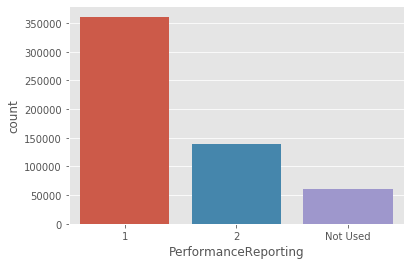

In [58]:
sns.countplot(x='PerformanceReporting',data = dfb); 

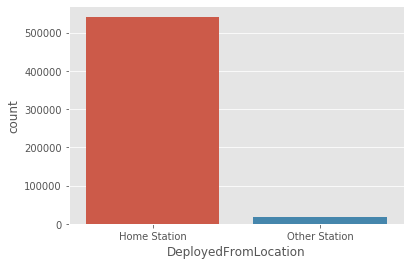

In [59]:
sns.countplot(x='DeployedFromLocation',data = dfb); 

In [60]:
dfb['DeployedFromLocation'].value_counts(normalize=True)*100

Home Station     96.640405
Other Station     3.359595
Name: DeployedFromLocation, dtype: float64

96% des mobilisations sont faite par les statitions qui reçoivent l'appel VS 3% par une autre.

-Top 10 des station deployées.

In [62]:
(dfb['DeployedFromStation_Name'].value_counts(normalize=True)*100).head(10)

Soho                3.270356
Paddington          2.377792
Lambeth             2.040427
North Kensington    1.989938
Euston              1.822236
Hammersmith         1.806894
Kentish Town        1.767466
Tottenham           1.753015
Brixton             1.734282
West Hampstead      1.732855
Name: DeployedFromStation_Name, dtype: float64

In [63]:
dfb.head()

,IncidentNumber,CalYear,HourOfCall,ResourceMobilisationId,Resource_Code,PerformanceReporting,DateAndTimeMobilised,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,...,DateAndTimeLeft,DateAndTimeReturned,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,PlusCode_Code,PlusCode_Description,DelayCodeId,DelayCode_Description
0,000003-01012020,2020,0,5547476,G232,1,01/01/2020 00:06:30,01/01/2020 00:07:48,01/01/2020 00:11:54,78.0,...,01/01/2020 00:33:14,NaN,G23,Hillingdon,Home Station,1,Initial,Initial Mobilisation,NaN,NaN
1,000008-01012020,2020,0,5547478,H421,1,01/01/2020 00:11:05,01/01/2020 00:12:05,01/01/2020 00:14:20,60.0,...,01/01/2020 01:00:07,NaN,H42,Richmond,Home Station,1,Initial,Initial Mobilisation,NaN,NaN
2,000009-01012020,2020,0,5547479,A341,1,01/01/2020 00:11:16,01/01/2020 00:13:04,01/01/2020 00:18:22,108.0,...,01/01/2020 00:52:05,NaN,A34,Edmonton,Home Station,1,Initial,Initial Mobilisation,9.0,"Traffic, roadworks, etc"
3,000003-01012020,2020,0,5547480,G231,2,01/01/2020 00:11:33,01/01/2020 00:12:36,01/01/2020 00:16:25,63.0,...,01/01/2020 00:21:29,NaN,G23,Hillingdon,Home Station,2,Initial,Initial Mobilisation,NaN,NaN
4,000011-01012020,2020,0,5547482,H351,1,01/01/2020 00:12:02,01/01/2020 00:13:08,01/01/2020 00:16:11,66.0,...,01/01/2020 00:44:39,NaN,H35,Tooting,Home Station,1,Initial,Initial Mobilisation,NaN,NaN


- Travaillons sur la base de mobilisation en vue de la jointer avec la base des incidents.
Nous allons supprimer dans une premier temps les variables qui ne nous intéresse pas.

In [3]:
from datetime import datetime
# conversion des dates afin de calculer une variables 
dfb['DateAndTimeArrived'] = pd.to_datetime(dfb['DateAndTimeArrived'])
dfb['DateAndTimeLeft'] = pd.to_datetime(dfb['DateAndTimeLeft'])
dfb['DateCalculer'] = dfb['DateAndTimeLeft'] - dfb['DateAndTimeArrived']

In [114]:
dfb_drop=dfb.drop(["CalYear", "HourOfCall","ResourceMobilisationId","DateAndTimeMobilised","DateAndTimeMobile","DateAndTimeArrived","DateAndTimeLeft","DateAndTimeReturned","DateAndTimeReturned"],axis = 1, inplace=True)dfb_drop=dfb.drop(["CalYear", "HourOfCall","ResourceMobilisationId","DateAndTimeMobilised","DateAndTimeMobile","DateAndTimeArrived","DateAndTimeLeft","DateAndTimeReturned","DateAndTimeReturned"],axis = 1, inplace=True)

In [4]:
dfb.head()

,IncidentNumber,CalYear,HourOfCall,ResourceMobilisationId,Resource_Code,PerformanceReporting,DateAndTimeMobilised,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,...,DateAndTimeReturned,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,PlusCode_Code,PlusCode_Description,DelayCodeId,DelayCode_Description,DateCalculer
0,000003-01012020,2020,0,5547476,G232,1,01/01/2020 00:06:30,01/01/2020 00:07:48,2020-01-01 00:11:54,78.0,...,NaN,G23,Hillingdon,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,00:21:20
1,000008-01012020,2020,0,5547478,H421,1,01/01/2020 00:11:05,01/01/2020 00:12:05,2020-01-01 00:14:20,60.0,...,NaN,H42,Richmond,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,00:45:47
2,000009-01012020,2020,0,5547479,A341,1,01/01/2020 00:11:16,01/01/2020 00:13:04,2020-01-01 00:18:22,108.0,...,NaN,A34,Edmonton,Home Station,1,Initial,Initial Mobilisation,9.0,"Traffic, roadworks, etc",00:33:43
3,000003-01012020,2020,0,5547480,G231,2,01/01/2020 00:11:33,01/01/2020 00:12:36,2020-01-01 00:16:25,63.0,...,NaN,G23,Hillingdon,Home Station,2,Initial,Initial Mobilisation,NaN,NaN,00:05:04
4,000011-01012020,2020,0,5547482,H351,1,01/01/2020 00:12:02,01/01/2020 00:13:08,2020-01-01 00:16:11,66.0,...,NaN,H35,Tooting,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,00:28:28
